# Import Library

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

# Membaca Dataset

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Visualisasi

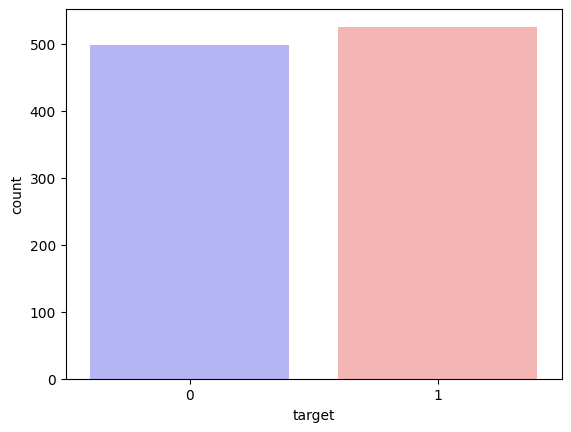

In [5]:
df.target.value_counts()
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

#### target: memiliki penyakit jantung atau tidak (1 = ya, 0 = tidak)

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Persentase pasien tidak memiliki penyakit jantung: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Persentasi pasien memiliki penyakit jantung: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Persentase pasien tidak memiliki penyakit jantung: 48.68%
Persentasi pasien memiliki penyakit jantung: 51.32%


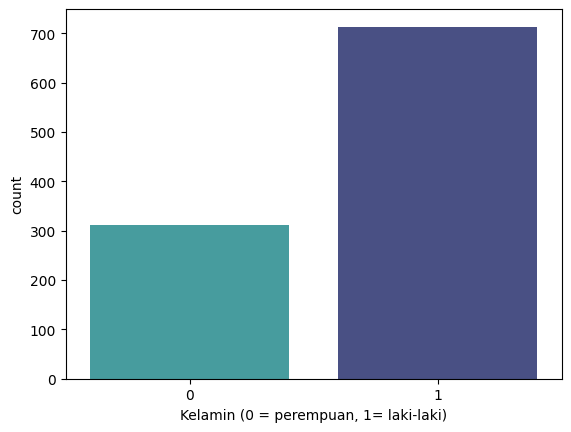

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Kelamin (0 = perempuan, 1= laki-laki)")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Persentase pasien perempuan: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Persentase pasien laki-laki: {:.2f}%".format((countMale / (len(df.sex))*100)))

Persentase pasien perempuan: 30.44%
Persentase pasien laki-laki: 69.56%


### Mengambil mean dari target

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


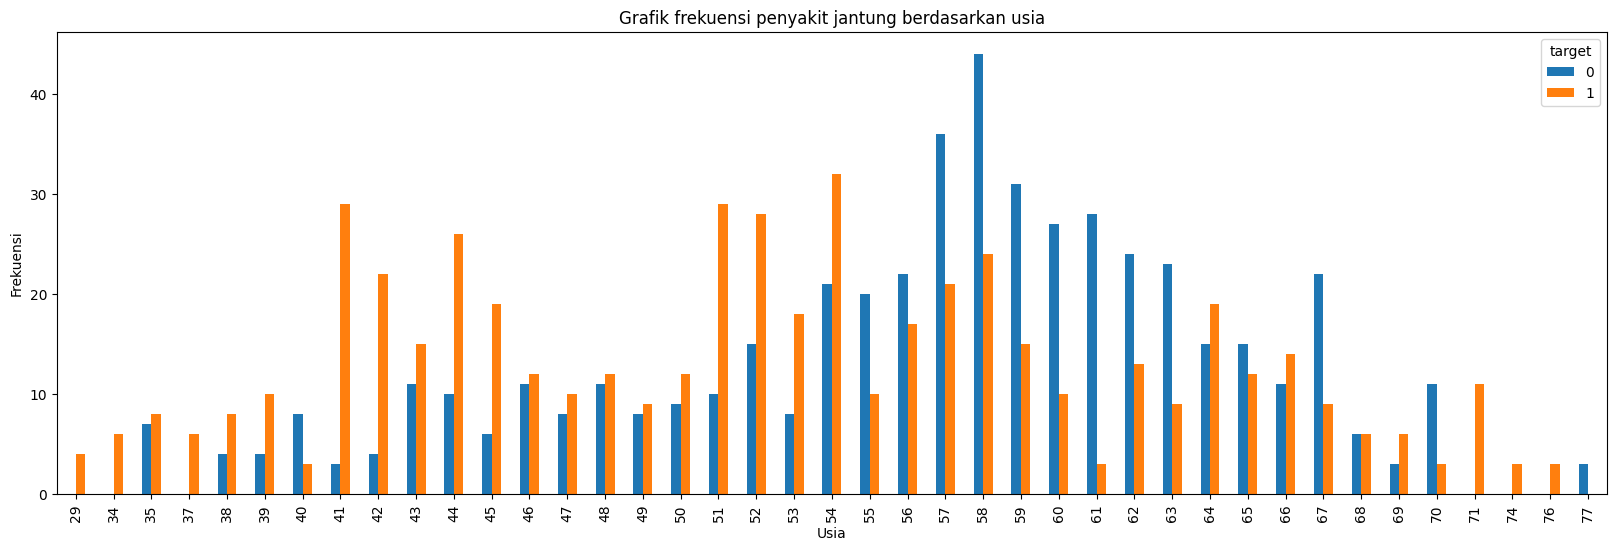

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Grafik frekuensi penyakit jantung berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('PenyakitJantungDanUmur.png')
plt.show()

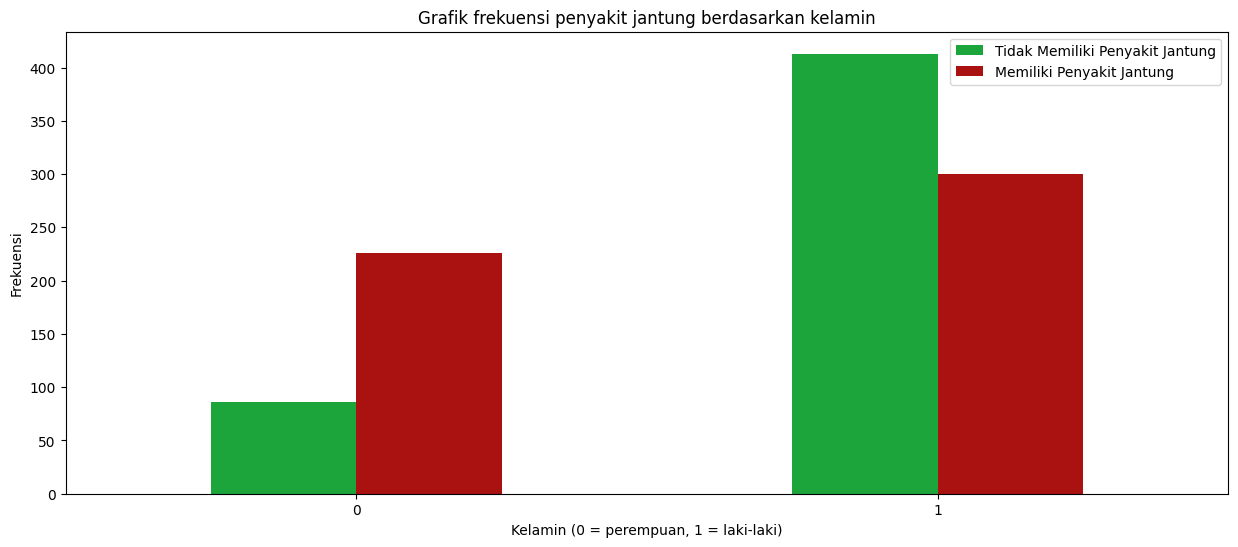

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kelamin')
plt.xlabel('Kelamin (0 = perempuan, 1 = laki-laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi')
plt.show()

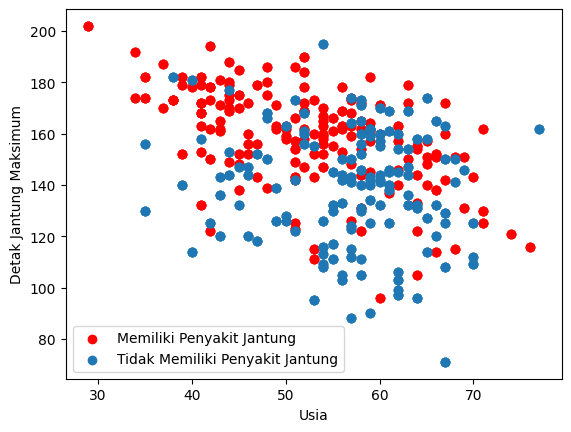

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Memiliki Penyakit Jantung", "Tidak Memiliki Penyakit Jantung"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

#### thalach - Detak jantung maksimum yang dicapai

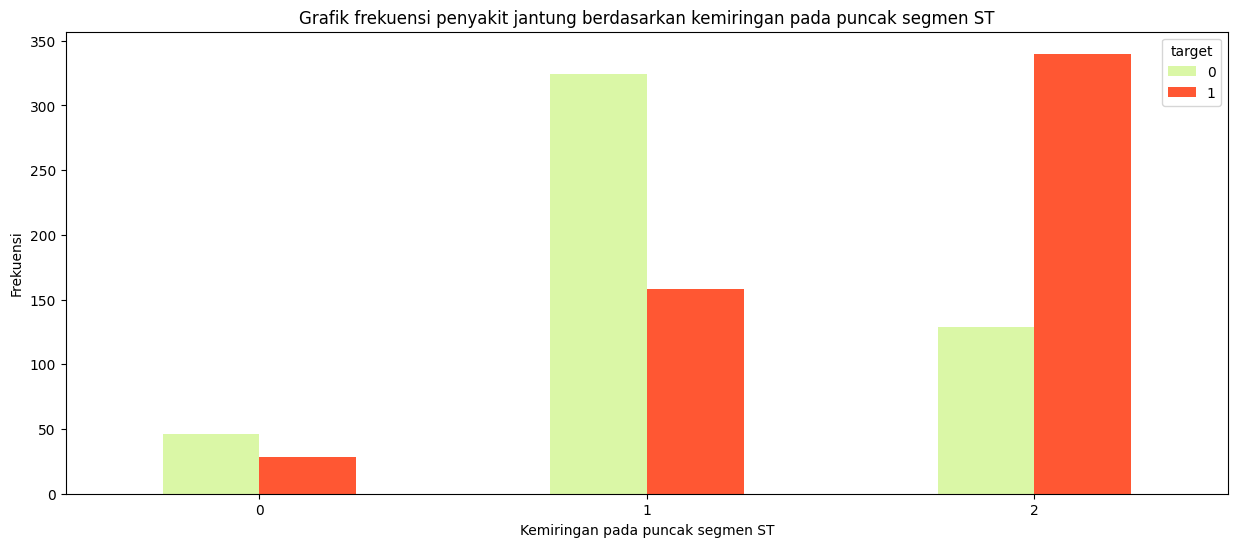

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kemiringan pada puncak segmen ST')
plt.xlabel('Kemiringan pada puncak segmen ST')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

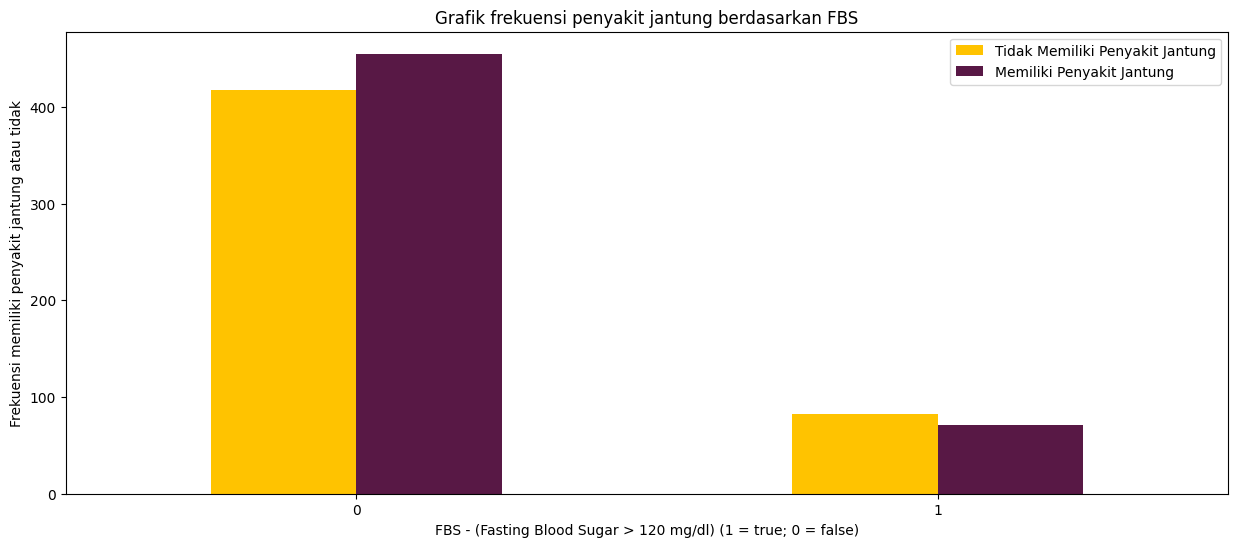

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

#### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

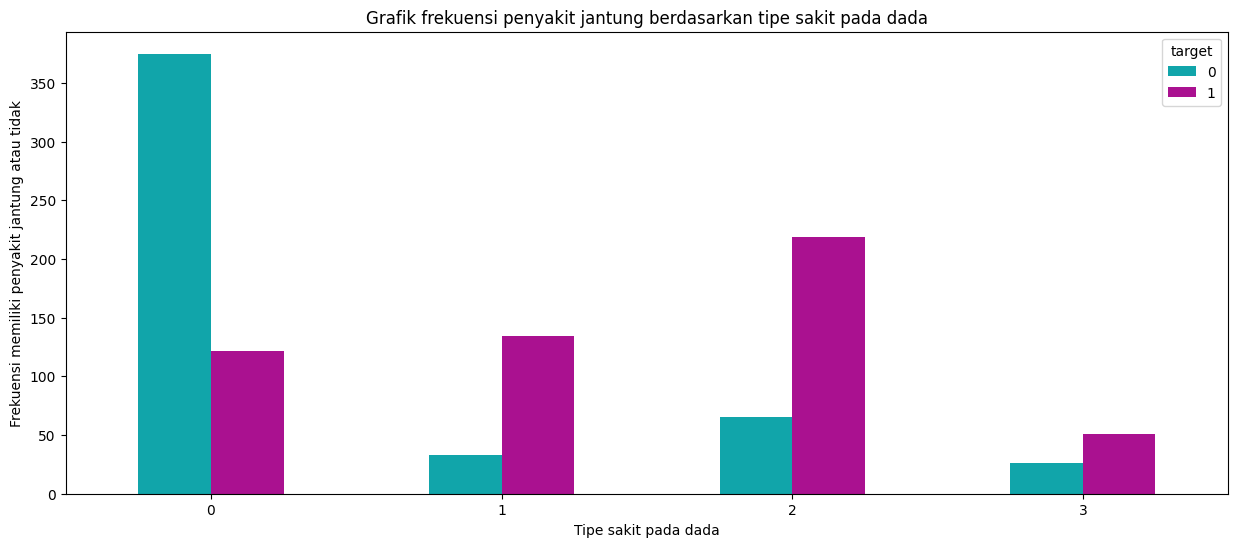

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan tipe sakit pada dada')
plt.xlabel('Tipe sakit pada dada')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

#### cp - tipe sakit pada dada

# Preprocessing

## Scaling

In [27]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(df[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_df = pd.DataFrame(normalized_array, columns=['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

df[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_df

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,0.196347,0.0,0.5,168,0.0,1.0,1.0,0.50,1.000000,0
1,53,1.0,0,140,0.175799,1.0,0.0,155,1.0,3.1,0.0,0.00,1.000000,0
2,70,1.0,0,145,0.109589,0.0,0.5,125,1.0,2.6,0.0,0.00,1.000000,0
3,61,1.0,0,148,0.175799,0.0,0.5,161,0.0,0.0,1.0,0.25,1.000000,0
4,62,0.0,0,138,0.383562,1.0,0.5,106,0.0,1.9,0.5,0.75,0.666667,0


## Heatmap

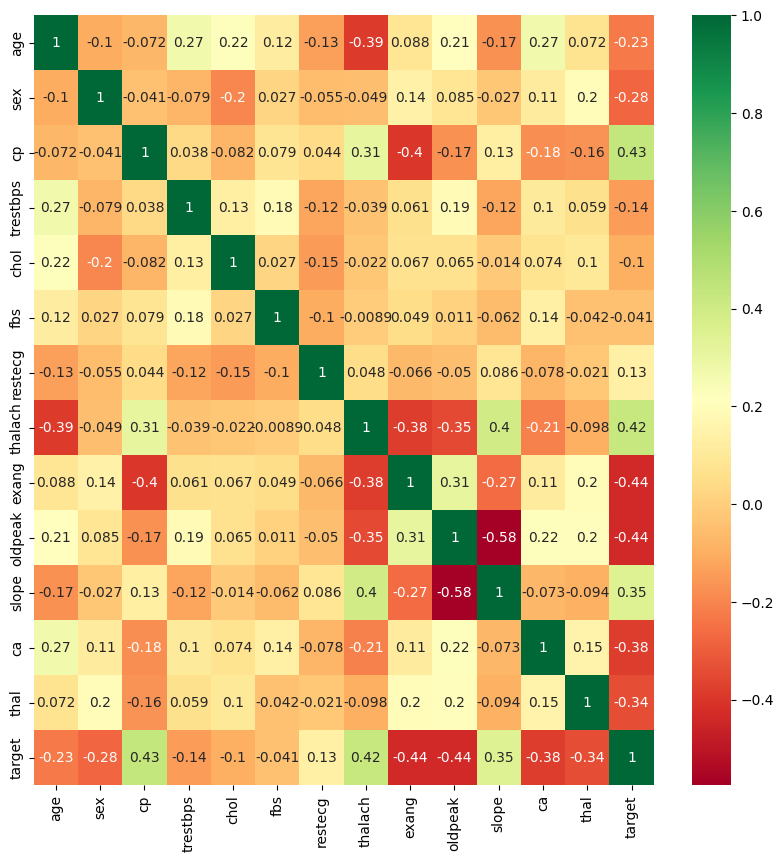

In [29]:
correlations = df.corr()
plt.figure(figsize=(10, 10))

heatmap_heart = sns.heatmap(df[correlations.index].corr(), annot=True, cmap='RdYlGn')

plt.show()

# Modeling

In [19]:
X = df.drop(['target'], axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 98,   0],
       [  0, 107]])

In [22]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall/Sensitivity:  1.0


# Predicting

In [23]:
smote = SMOTE(random_state = 45)

s_X_train, s_y_train =smote.fit_resample(X_train,y_train)
s_X_test, s_y_test = smote.fit_resample(X_test,y_test)

In [24]:
s_dt = DecisionTreeClassifier()

s_dt.fit(s_X_train, s_y_train)

s_y_pred = dt.predict(s_X_test)

In [25]:
s_cnf_matrix = metrics.confusion_matrix(s_y_test, s_y_pred)

s_cnf_matrix

array([[107,   0],
       [  0, 107]])

Data Akan berubah setiap run

- 22 pasien diprediksi bahwa mereka akan memiliki penyakit jantung, prediksinya benar (True-Positive)
- 24 pasien diprediksi bahwa mereka tidak akan memiliki penyakit jantung, prediksinya benar (True-Negative)
- 5 pasien diprediksi bahwa mereka akan memiliki penyakit jantung, namun prediksinya salah (False-Positive)
- 10 pasien diprediksi bahwa mereka tidak akan memiliki penyakit jantung, namun hasil prediksinya salah (False-Negative)

In [26]:
print("Accuracy: ", metrics.accuracy_score(s_y_test, s_y_pred))
print("Precision: ", metrics.precision_score(s_y_test, s_y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(s_y_test, s_y_pred))

Accuracy:  1.0
Precision:  1.0
Recall/Sensitivity:  1.0
